In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
tf.__version__

'2.8.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                            rotation_range=90,
                            brightness_range=(0.5,1), 
                            shear_range=0.2, 
                            zoom_range=0.2,
                            channel_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            rescale=1./255,
                            validation_split=0.3)

In [ ]:
import zipfile
local_zip = 'drive/MyDrive/Dataset/Sampah.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('content/input')
zip_ref.close()

In [ ]:
training_batches = img_generator.flow_from_directory(
    directory='../input/Sampah/train',
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    subset="training")

validatioin_batches = img_generator.flow_from_directory(
    directory='../input/Sampah/val',
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    subset="validation")

Found 3930 images belonging to 5 classes.
Found 715 images belonging to 5 classes.


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import zipfile
import random
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from keras.layers import Activation, Dense, Flatten
x = mobile.layers[-5].output
x = Flatten()(x)
output = Dense(5, activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Model
model = Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
history = model.fit(x=training_batches,
                    validation_data = validatioin_batches,
                    epochs=10,
)

Epoch 1/10
246/246 [==============================] - 359s 1s/step - loss: 0.6738 - accuracy: 0.7415 - val_loss: 0.7201 - val_accuracy: 0.7147
Epoch 2/10
246/246 [==============================] - 315s 1s/step - loss: 0.3857 - accuracy: 0.8659 - val_loss: 0.4622 - val_accuracy: 0.8224
Epoch 3/10
246/246 [==============================] - 310s 1s/step - loss: 0.3102 - accuracy: 0.8817 - val_loss: 0.4632 - val_accuracy: 0.8322
Epoch 4/10
246/246 [==============================] - 309s 1s/step - loss: 0.2751 - accuracy: 0.9036 - val_loss: 0.5391 - val_accuracy: 0.7804
Epoch 5/10
246/246 [==============================] - 311s 1s/step - loss: 0.2219 - accuracy: 0.9214 - val_loss: 0.3674 - val_accuracy: 0.8727
Epoch 6/10
246/246 [==============================] - 311s 1s/step - loss: 0.2008 - accuracy: 0.9316 - val_loss: 0.3952 - val_accuracy: 0.8685
Epoch 7/10
246/246 [==============================] - 312s 1s/step - loss: 0.1708 - accuracy: 0.9389 - val_loss: 0.3610 - val_accuracy: 0.9007

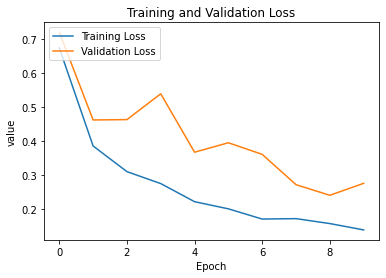

In [ ]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

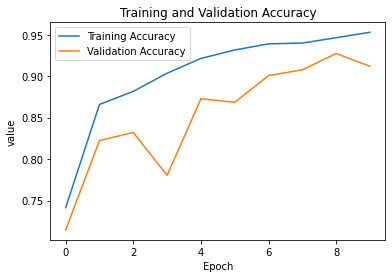

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Evaluating the model on test data

filenames = validatioin_batches.filenames
nb_samples = len(filenames)

model.evaluate_generator(validatioin_batches, nb_samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.2971723973751068, 0.9146853089332581]

In [ ]:
test_x, test_y = validatioin_batches.__getitem__(1)
preds = model.predict(test_x)

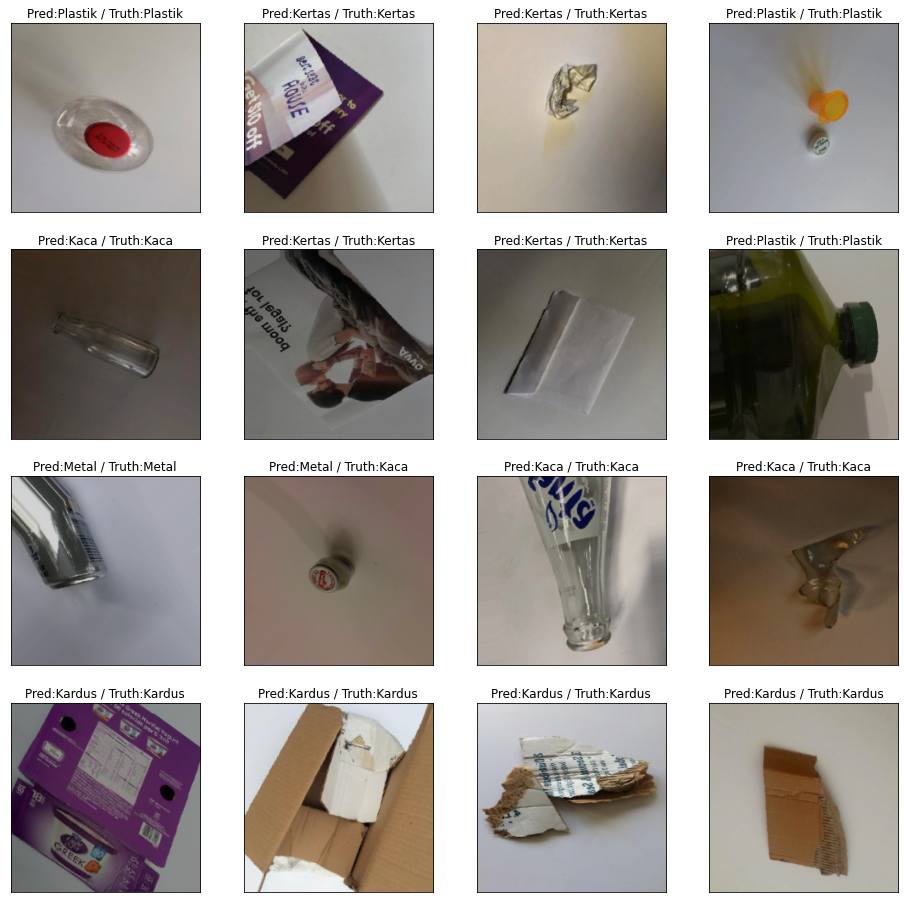

In [ ]:
# Comparing predcitons with original labels

labels = (training_batches.class_indices)
labels = dict((v,k) for k,v in labels.items())
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Pred:%s / Truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [ ]:
tf.saved_model.save(model,'tmp/model')

INFO:tensorflow:Assets written to: tmp/model/assets


In [ ]:
import pathlib
converter =tf.lite.TFLiteConverter.from_saved_model('tmp/model')
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

12821128

In [ ]:
model.save('my_model.h5')